<a href="https://colab.research.google.com/github/kimdesok/Statistical-Thinking-in-Python-Part-2/blob/main/Stats_by_Python5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Parameter estimation by optimization
>* Optimal parameters: how to find them
>* Your parameters are only good when your model fits your data
>* Goodness of fit is a good tool to see how well or significantly your data fits the model.


In [32]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns

#Importing numpy
import numpy as np

import pandas as pd

#Load a csv file at the Google drive to the colab
file_path = r'/content/drive/MyDrive/datasets/mlb_nohitters.csv'
nohitter_game_no = np.loadtxt(fname=file_path, skiprows=1, usecols=range(1,2), delimiter=',')
nohitter_times = []

for i in range(len(nohitter_game_no)-1):
  nohitter_times.append(nohitter_game_no[i+1] - nohitter_game_no[i])
#print(nohitter_times)

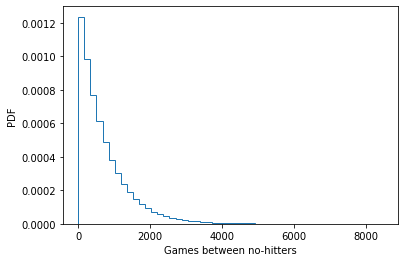

In [33]:
# Seed random number generator
np.random.seed(42)

# Compute mean no-hitter time: tau
tau = np.mean(nohitter_times)

# Draw out of an exponential distribution with parameter tau: inter_nohitter_time
inter_nohitter_time = np.random.exponential(tau, 100000)

# Plot the PDF and label axes
_ = plt.hist(inter_nohitter_time, bins=50, density=True, histtype='step')
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()


In [5]:
#!mv /content/mlb_nohitters.csv /content/drive/MyDrive/datasets

#Goodness of fit between CDF and ECDF
>* Overlaying the theoretical CDF with empirical ECDF and visual assessment

In [34]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

Text(0, 0.5, 'CDF')

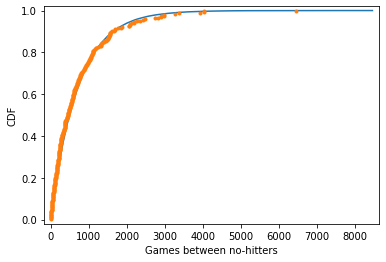

In [35]:
# Create an ECDF from real data: x, y
x, y = ecdf(nohitter_times)

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_nohitter_time)

# Overlay the plots
plt.plot(x_theor, y_theor)
plt.plot( x, y, marker='.', linestyle='none')

# Margins and axis labels
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

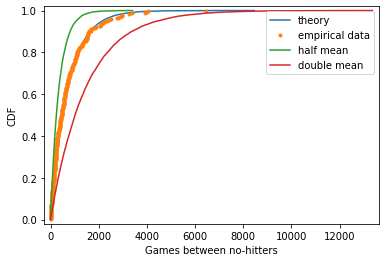

In [37]:
# Plot the theoretical CDFs
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Take samples with half tau: samples_half
samples_half = np.random.exponential(0.5*tau, size=10000)

# Take samples with double tau: samples_double
samples_double = np.random.exponential(2*tau, size=10000)

# Generate CDFs from these samples
x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

# Plot these CDFs as lines
_ = plt.plot(x_half, y_half)
_ = plt.plot(x_double, y_double)
plt.legend(['theory','empirical data','half mean', 'double mean'])
# Show the plot
plt.show()

#Linear Regression by least squares

In [82]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)
    # Return entry [0,1]
    return corr_mat[0,1]

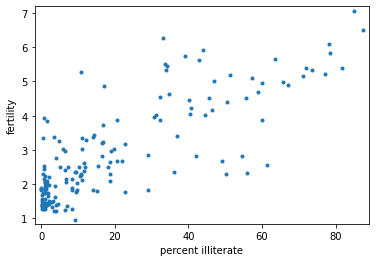

0.8041324026815344


In [83]:
# Load a csv file at the Google drive to the colab

file_path = r'/content/drive/MyDrive/datasets/female_literacy_fertility.csv'

df = pd.read_csv(file_path)

literacy = df['female literacy']

illiteracy = 100.0 - literacy

fertility = df['fertility']

#Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Set the margins and label axes
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Show the plot
plt.show()

# Show the Pearson correlation coefficient
print(pearson_r(illiteracy, fertility))

slope = 0.04979854809063423 children per woman / percent illiterate
intercept = 1.8880506106365567 children per woman


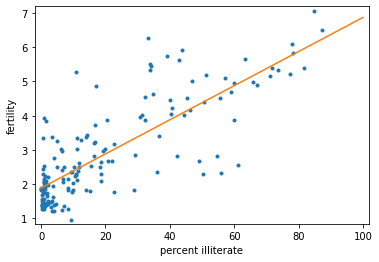

In [84]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(illiteracy, fertility, deg=1)

# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

# Make theoretical line to plot
x = np.array([0,100])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()

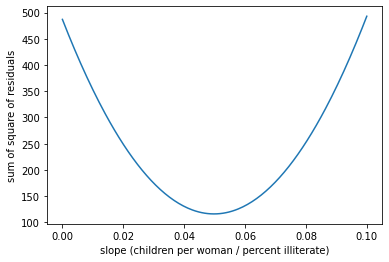

In [85]:
# Specify slopes to consider: a_vals
a_vals = np.linspace(0,0.1, 200) 

# Initialize sum of square of residuals: rss
rss = np.empty_like(a_vals)

# Compute sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss[i] = np.sum((fertility - a * illiteracy - b)**2)

# Plot the RSS
plt.plot(a_vals, rss, '-')
plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')

plt.show()

#The importance of EDA(Exploratory Data Analysis)

0.5000909090909094 3.000090909090908


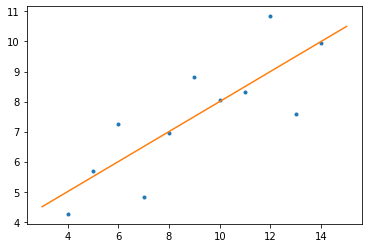

In [87]:
x = [10. , 8. ,13. , 9. , 11., 14. , 6. , 4., 12. , 7.,  5.] 
y = [ 8.04 , 6.95,  7.58,  8.81 , 8.33 , 9.96 , 7.24 , 4.26 , 10.84 , 4.82 , 5.68]
# Perform linear regression: a, b
a, b = np.polyfit(x, y, deg=1)

# Print the slope and intercept
print(a, b)

# Generate theoretical x and y data: x_theor, y_theor
x_theor = np.array([3, 15])
y_theor = a * x_theor + b

# Plot the Anscombe data and theoretical line
_ = plt.plot(x, y, marker='.' , linestyle='none')
_ = plt.plot(x_theor,y_theor)

In [90]:
anscombe_x = [([10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.]), 
              ([10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.]), 
              ([10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.]), 
              ([ 8.,  8.,  8.,  8.,  8.,  8.,  8., 19.,  8.,  8.,  8.])]
anscombe_y = [([ 8.04,  6.95,  7.58,  8.81,  8.33,  9.96,  7.24,  4.26, 10.84, 4.82,  5.68]), 
              ([9.14, 8.14, 8.74, 8.77, 9.26, 8.1 , 6.13, 3.1 , 9.13, 7.26, 4.74]), 
              ([ 7.46,  6.77, 12.74,  7.11,  7.81,  8.84,  6.08,  5.39,  8.15, 6.42,  5.73]), 
              ([ 6.58,  5.76,  7.71,  8.84,  8.47,  7.04,  5.25, 12.5 ,  5.56, 7.91,  6.89])]

# Iterate through x,y pairs
for x, y in zip(anscombe_x , anscombe_y ):
    # Compute the slope and intercept: a, b
    a, b = np.polyfit(x, y, deg=1)

    # Print the result
    print('slope:', a, 'intercept:', b)

slope: 0.5000909090909094 intercept: 3.000090909090908
slope: 0.5000000000000003 intercept: 3.0009090909090905
slope: 0.49972727272727313 intercept: 3.002454545454545
slope: 0.4999090909090908 intercept: 3.0017272727272735
